# Homework 1

### CS328 — Numerical Methods for Visual Computing
- - -

**Out** on Friday 29/9, **due** on Friday 13/10.

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text. Please use the same format when submitting your answers. Begin your response to each problem with a <tt>&nbsp;<b>## Solution</b>&nbsp;&nbsp;</tt> markdown cell. Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use <a href="https://www.continuum.io/downloads">Anaconda</a>, specifically the version based on Python 3.6.

<div class="alert alert-warning">
Homework assignments in CS328 count towards your final grade and must therefore be done individually.
</div>

### Prelude

The following fragment imports NumPy and Matplotlib and configures the latter to produce nice graphics on modern high-resolution screens. The import statements at the end establish a shorthand notation for the most common integer and floating point formats.

In [96]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt

from numpy import uint16  as u16
from numpy import uint32  as u32
from numpy import uint64  as u64
from numpy import float16 as f16
from numpy import float32 as f32
from numpy import float64 as f64

Two more definitions: the helper functions ``f2i`` and ``i2f``  below reinterpret floating point values as an integers and vice versa. We'll use these in Problem 3 to access the bit-level representation of an IEEE 754 floating point value.

In [97]:
def f2i(value):
    ''' Reinterpret floating point value as integer '''
    return value.view('u%i' % value.itemsize)

def i2f(value):
    ''' Reinterpret integer as floating point value '''
    return value.view('f%i' % value.itemsize)

## Problem 1: Images, slicing, and color balancing (15 pts)

The following two lines of code download a portrait photograph from the Wikipedia article on [color balance](https://en.wikipedia.org/wiki/Color_balance) and store it in a single precision NumPy array named ``image``, whose pixels are in the range ``[0.0, 1.0]``.

In [98]:
import PIL, requests
image = np.array(PIL.Image.open(requests.get('https://goo.gl/VcYNGN', stream=True).raw), dtype = np.float32) / 255

Try plotting this image using ``plt.imshow``.

### Solution 1.1

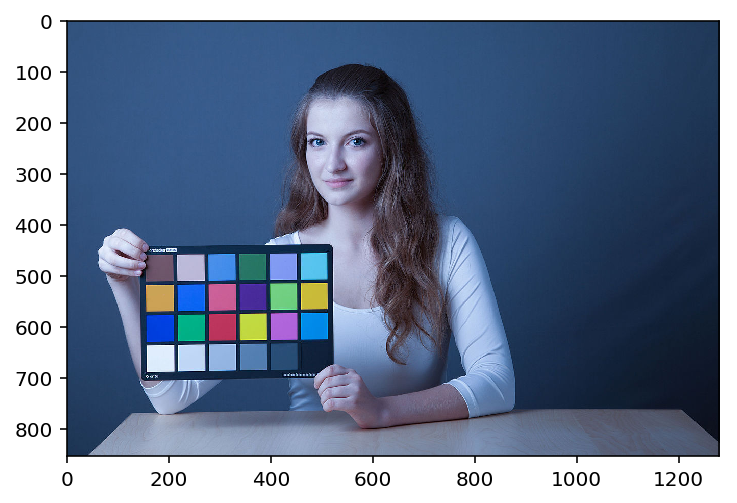

In [177]:
img = plt.imshow(image)

You will notice that the colors are distorted by a strong blue tint. Such intense color casts can lead to unnatural appearance and are usually not desired in portrait photography. In such cases, *color balancing* can be used to post-process the colors of an existing image to e.g. ensure that white objects indeed appear white in the image. One of the simplest kinds of color balancing is known as *white balancing*. Here, we select a region of the image that is known to contain a neutral color, and we then determine the reciprocal of the associated red, green, and blue color values. Afterwards, the color channels of the entire image are scaled by these reciprocals, ensuring that the selected region becomes neutral (i.e. it has similar amounts of red, green, and blue).

Note that the woman holds a [color checker](https://en.wikipedia.org/wiki/ColorChecker) in her hands. A color checker consists of an arrangement of colored patches with known color values, and the last row usually contains neutral colors. We will  use the second neutral patch on the bottom left to white-balance this image.

**TODO**: Use NumPy slicing operations to crop out the second neutral patch in the last row (counting from the left side) and plot it using ``plt.imshow``. The cropped region should be as large as possible without including the black frame or other patches.

## Solution 1.2

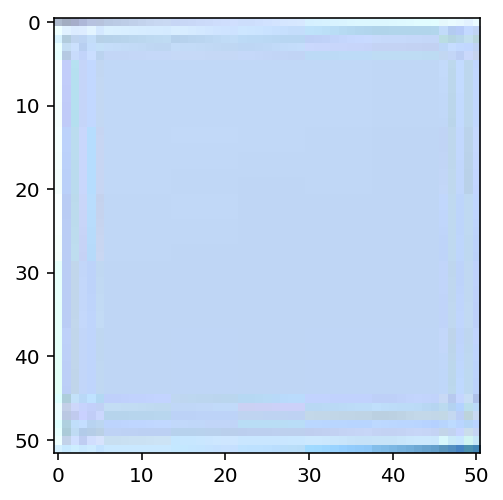

In [273]:
imgcopy = np.copy(image)
imgcopy = imgcopy[635:687,218:269]
img = plt.imshow(imgcopy)

**TODO**: Compute the mean of the R, G, and B color channels over the patch. You should be able to accomplish this with a single function call to ``np.mean``. Print the computed mean using ``print()``.

## Solution 1.3

In [274]:
mean = np.mean(imgcopy,axis=(0,1))
print(mean)

[ 0.75483215  0.84619546  0.96413934]


**TODO**: Now, use *broadcasting* to multiply the image R, G, B channels by the reciprocals of the values computed above and visualize the result using ``plt.imshow``. *Note*: You may need to scale the image by a small amount (e.g. ``0.85``) to prevent pixels overflowing to a value greater than ``1.0``, which will lead to strange color artifacts.

## Solution 1.4

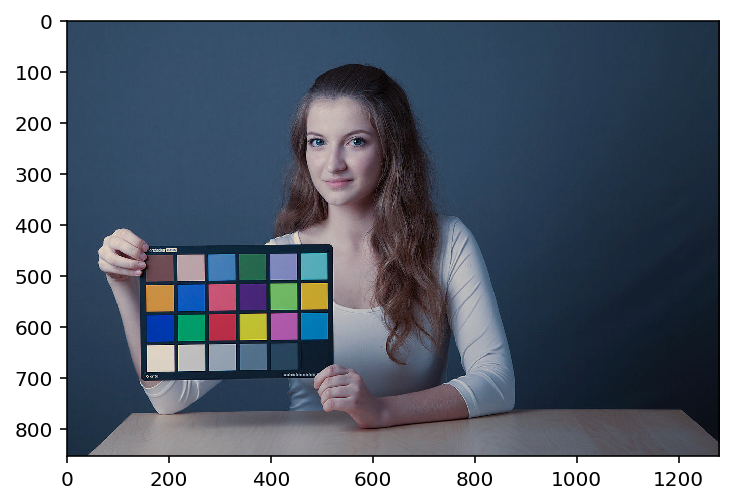

In [277]:
img_copy = np.copy(image)
meanr = 1/mean
img_copy = img_copy * (1/mean) * 0.75
plt.imshow(img_copy)

# Problem 2: Triple Birthday Paradox (35 pts)

Let us again consider the [Birthday Paradox](https://en.wikipedia.org/wiki/Birthday_problem) that was introduced during the first week's exercise session. In this task, we will study a slightly modified problem that can be summarized with the following question:

**What is the probability that at least *three* people in a random set of $n$ people share the same birthday?**

In the following, you will develop a simple numerical Python program to solve this problem and then make use of vectorization with NumPy arrays to speed it up. For this reason, you should use the "magic" Jupyter function ```%%time``` to profile the execution time of your implementation at every step.

## Problem 2.1: Basic Python Implementation (10 pts)

**TODO**: Write a basic Python program<a name="myfootnote1"><sup>[1]</sup></a> that estimates of the "3-birthdays probability" based on random sampling. 

Feel free to reuse code from the [first weeks notebook](https://moodle.epfl.ch/mod/resource/view.php?id=959064) to get some inspiration on how you would do this.
The structure should stay exactly the same:
1. Choose $n$ random birthdays (i.e. integers)
2. Check if *three* of the birthdays are the same
3. Repeat this process $K$ times and keep track of how many times it was true
4. Return the ratio between "number successful events" and "total number events" ($K$)

When you chose $K$ large enough, a simulation like this should give you a good estimate of the true probability.

Remember that you can generate random integers by using *```randint```* from the *```random```* module:

```python
import random as rnd
a = rnd.randint(0, 10) # Random integer between 0 and 10 (including)
```
[[1]](#myfootnote1) Do **not** use any of the NumPy, SciPy, ... libraries in this part of the exercise—only pure Python is allowed.

### Solution 2.1.1

In [102]:
## TODO... Fill in the inner loop of the following function
import random as rnd

# For n people, compute an approximation of the probability that at
# least three people share the same birthday, using K iterations
def birthday_paradox_basic(n, K):
    counter = 0 # Keep track of how often the statement is true
    
    # Perform K iterations of the same experiment.
    for it in range(K):
        success = False # Replace!
        dates = [rnd.randint(0,365) for i in range(n)]
        if len([x for x in dates if dates.count(x) > 2]) > 0:
            success = True
        if success:
            counter += 1  
    
    # Return average probability
    return counter / K

To test if your program is operating correctly, try running it for $n=88$ people using a very high value of $K$. This should give you (on average) a probability slightly above $0.5$:

### Solution 2.1.2

In [103]:
print(birthday_paradox_basic(88,100000))

0.50837


**TODO**: Finally, profile the running time of the implementation and report how much time it took for $K=100000$.

### Solution 2.1.3 

In [104]:
import timeit
start = timeit.default_timer()
birthday_paradox_basic(88,100000)
end = timeit.default_timer() - start
print(end)

34.49838466703659


## Problem 2.2: Vectorized implementation using NumPy (15 pts)

As you likely noticed, an implementation in pure Python is rather slow! As a frame of reference: an implementation with list comprehensions (as was done during the exercise session) can easily take half a minute to complete for high $K$ such as above. Creating lists of random integers is a particularly slow operation that can be considerably accelerated using vectorized NumPy functions that process entire NumPy arrays at a once.

**TODO**: Write another function that computes the same result, but this time, replace the inner part of the "*```for it in range(K)```*" loop with a combination of NumPy array functions.<a name="myfootnote2"><sup>[2]</sup></a>

Here are a number of NumPy functions that you may find helpful:
* ```np.random.randint```
* ```np.bincount```
* ```np.unique```
* ```np.min, np.max```
* ```np.arange```
* ```np.any```

You can read about these in the [NumPy Documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html).

[[2]](#myfootnote2) In this part of the exercise, do **not** use Python lists and list comprehensions, and do not explicitly iterate over the days of the year. Do not use ```np.vectorize```, which merely emulates vectorization using a slow Python ``for`` loop.

### Solution 2.2.1

In [119]:
## TODO... Fill in the inner loop of the following function

def birthday_paradox_numpy(n, K):
    counter = 0 # Keep track of how often the statement is true
    
    # Perform K iterations of the same experiment.
    for it in range(K):
        success = False # Replace!
        dates = np.bincount(np.random.randint(365,size=n))
        if np.any(dates>2):
            success = 1;
        
        if success:
            counter += 1  
    
    # Return average probability
    return counter / K

**TODO**: Profile the running time of the implementation vectorized implementation for $K=100000$ and determine the speedup.

### Solution 2.2.2 

In [120]:
print(birthday_paradox_numpy(88,100000)) ## Speedup !

0.5128


In [278]:
start = timeit.default_timer()
birthday_paradox_numpy(88,100000)
end2 = timeit.default_timer() - start
print(end2)
print("The speedup is: ", end2 * 100/end,"%")

1.33968257997185
The speedup is:  97.53917816080939


## Problem 2.3: Hacker points (5 points)
-- --

<div class="alert alert-warning">
Exercises designated as *hacker points* are undervalued problems that are completely optional (i.e. there is no need to do them to get full grades in this course). Partial answers don't count—hacker points are either awarded in full or not at all.</div> <br/>Although the vectorized implementation is a tremendous improvement, it still contains a loop over a potentially large number of virtual experiments. We can do better! Modify your previous implementation so that it fully relies on vectorized NumPy functions and contains no more loops.

## Problem 3: Measuring error using ULPs (25 pts)
-- --

The bit-level layout of IEEE754 floating point values is specially designed such that contiguous ranges of positive (or negative) floating point numbers are also contiguous when re-interpreted as integers. Use this property along with the functions ``f2i`` and ``i2f`` and the aliases ``f16`` etc. defined above to answer the following questions:

1. How many floating point values are located between the values ``1`` and ``2``, including the endpoints? How about ``1001`` and ``1002`` ? Give answers for 16, 32, and 64 bit precision variants. <br><br>

2. How large is 1 ULP for the value $\pi$ expressed in 64 bit arithmetic? Remember that one ULP was defined as the jump that occurred when changing the last mantissa bit from a ``1`` to a ``0`` (or vice versa).<br><br>

3. Suppose that we compute the surface area of the earth from its radius of $\approx 6.353\cdot 10^6m$ using the expression $A=\pi r^2$. Assuming that the earth is perfectly spherical, and that the discretization of $\pi$ is the only source of error in this computation, bound the absolute error in square meters.

## Solution 3.1

In [259]:
print("Number of floating point values between 1 and 2 for 16 bit precision: ",f2i(f16(2))-f2i(f16(1)) +1)
print("Number of floating point values between 1 and 2 for 32 bit precision: ",f2i(f32(2))- f2i(f32(1))+1)
print("Number of floating point values between 1 and 2 for 64 bit precision: ",f2i(f64(2))-f2i(f64(1))+1)
print("Number of floating point values between 1001 and 1002 for 16 bit precision: ",f2i(f16(1002)) - f2i(f16(1001))+1)
print("Number of floating point values between 1001 and 1002 for 32 bit precision: ",f2i(f32(1002)) - f2i(f32(1001))+1)
print("Number of floating point values between 1001 and 1002 for 64 bit precision: ",f2i(f64(1002)) - f2i(f64(1001))+1)

Number of floating point values between 1 and 2 for 16 bit precision:  1025
Number of floating point values between 1 and 2 for 32 bit precision:  8388609
Number of floating point values between 1 and 2 for 64 bit precision:  4.50359962737e+15
Number of floating point values between 1001 and 1002 for 16 bit precision:  3
Number of floating point values between 1001 and 1002 for 32 bit precision:  16385
Number of floating point values between 1001 and 1002 for 64 bit precision:  8.79609302221e+12


## Solution 3.2 

In [269]:
print(i2f(f2i(f64(np.pi))^u64(1))-f64(np.pi))

4.4408920985e-16


## Solution 3.3 

In [271]:
print("surface of the earth: ", ((6.353e6)*(6.353e6))*np.pi*4)
pi = (6.353e6)*(6.353e6)*np.pi*4
mypi = (6.353e6)*(6.353e6)*i2f(f2i(f64(np.pi))^u64(1))*4
print("Absolute error: ",np.abs(pi-mypi))

surface of the earth:  507186370915240.4
Absolute error:  0.0625


## Problem 4: Series approximations (25 pts)
-- --

We will revisit an experiment from Lecture 1 involving a numerical implementation of the sine function that was based on its underlying power series representation:

$$
\sin(x)=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots
$$

1. Evaluate the power series at \(x=20\) using the first 100 terms and compute the absolute and relative error (you can assume that ``np.sin`` is accurate). *Hint*: the factorial function is provided in ``scipy.misc``.<br><br>

2. Express the error as an integer number of ULPs (see also Problem 3) -- in other words, how many floating point numbers are between the true and the approximate answer?<br><br>

3. Now, evaluate the exponential function at ``x=20`` using the same approach: using its corresponding power series, and assuming that ``np.exp`` is accurate. Specify the absolute and relative error. What do you observe? Why is this the case?<br><br>

4. List three different kinds of numerical problems that can arise when evaluating the above two power series with very many terms (e.g. thousands), and what parts of the expression specifically cause them.<br><br>

## Solution 4.1

In [236]:
from scipy.misc import factorial
def sin(x):
    sum=0
    sgn=1
    for i in range(1,101,2):
        sum += sgn *((x**i) / factorial(i))
        sgn = sgn * -1
    return sum
print(sin(20))
print(np.sin(20))

absolute_error = sin(20) - np.sin(20)
relative_error = absolute_error / np.sin(20)
print("The absolute error is: ",absolute_error)
print("The relative error is: ",relative_error)

0.912945256275
0.912945250728
5.54690016141e-09
6.07583002047e-09


## Solution 4.2

In [267]:
print(f2i(f64(sin(20)))- f2i(f64(np.sin(20)))+1)

49962036.0


## Solution 4.3

In [279]:
def exp(x):
    sum = 0
    for i in range(0,101):
        sum += (x**i) / factorial(i)
    return sum

print(exp(20))
print(np.exp(20))

absolute_error = exp(20) - np.exp(20)
relative_error = absolute_error/np.exp(20)
print("The absolute error is ",np.abs(absolute_error))
print("The relative error is ",np.abs(relative_error))

485165195.41
485165195.41
The absolute error is  1.19209289551e-07
The relative error is  2.45708658986e-16


## Solution 4.4 

As we saw in the first lecture, since computers have finite amount of storage capacity,fractional numbers are forced to approximate. This might lead to catastrophic error while coding. In the solutions above, np.exp or np.sin may have been rounded.
Also, we also have overflow and underflow problems, while operating on bits.